# A4

| L    | 53.3cm     |             |             |             |             |
|------|------------|-------------|-------------|-------------|-------------|
|      | DG1        | DG2         | DG3         | DG4         | DG5         |
| N    | 5          | 10          | 12          | 10          | 11          |
| 总长 | 18.30-9.65 | 20.15-13.20 | 20.35-15.15 | 15.15-10.80 | 19.65-14.90 |

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data1 = pd.read_csv("MR1.csv")

In [3]:
def dataProcess(data, chi, gamma):
    measure = np.zeros((5,5))
    for i in range(0,5):
        for k in range(0,5):
            measure[i][k] = data[(data['x'] == (k - 2)) & (data['y'] == (i - 2))]['I']
    mr0phase = np.array([[3.1420,0.4636,0.0,-0.4636,3.1420],[0.0,1.5710,-2.0340,0.4636,0.0],[3.1420,-1.5710,0.0,1.5710,3.1420],[0.0,-0.4636,2.340,-1.5710,0.0],[3.1420,0.4636,0.0,-0.4636,3.1420]])
    result = np.zeros((5,5))
    for i in range(0,5):
        for k in range(0,5):
            result[i][k] = np.sqrt(measure[i][k])*np.cos(mr0phase[i][k]-np.pi*0.5*(chi*(k-2)+gamma*(i-2)))
    return result

In [4]:
def indexOfT(data):
    result = 0
    for i in range(0,5):
        for k in range(0,5):
            result += data[i][k]
    return result;

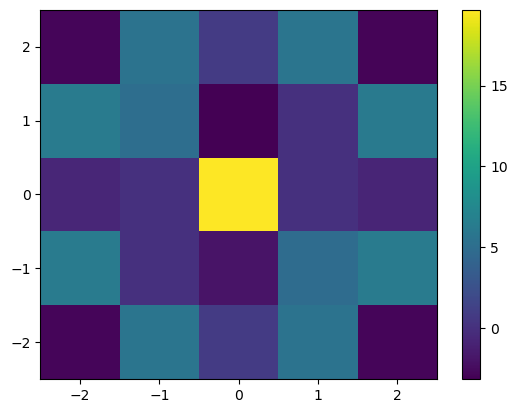

In [5]:
resultplot = dataProcess(data1,0,0)
fig0, ax = plt.subplots()
x = np.arange(-2.5,3,1)
y = np.arange(-2.5,3,1)
c = ax.pcolormesh(x,y,resultplot)
fig0.colorbar(c,ax=ax)
plt.savefig("ft00.pdf")

In [6]:
def indexGrid(data):
    result = np.zeros((4,4))
    for i in range(0,4):
        for k in range(0,4):
            result[i][k] = indexOfT(dataProcess(data, k, i))
    return result

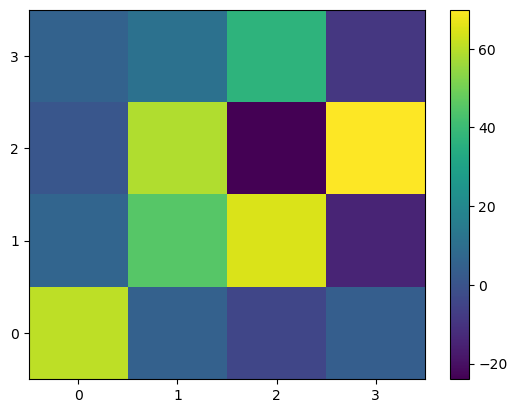

In [7]:
plotData = indexGrid(data1)
fig1, ax = plt.subplots()
x = np.arange(-0.5,4,1)
y = np.arange(-0.5,4,1)
c = ax.pcolormesh(x,y,plotData)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
fig1.colorbar(c,ax=ax)
plt.savefig("mr1.pdf")

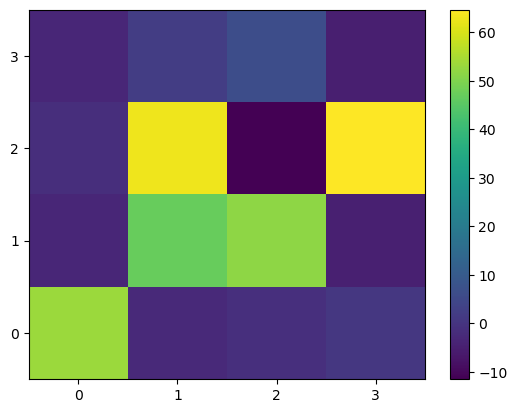

In [8]:
plotData = indexGrid(pd.read_csv('MR0.csv'))
fig2, ax = plt.subplots()
x = np.arange(-0.5,4,1)
y = np.arange(-0.5,4,1)
c = ax.pcolormesh(x,y,plotData)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
fig1.colorbar(c,ax=ax)
plt.savefig("mr0.pdf")